In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
from pandas import datetime 
import math, time 
import itertools
from sklearn import preprocessing 
import datetime 
from operator import itemgetter 
from sklearn.metrics import mean_squared_error
from math import sqrt 
from keras.models import Sequential 
from keras.layers.core import Dense, Dropout, Activation 

Using TensorFlow backend.


In [3]:
from keras.layers.recurrent import LSTM

In [4]:
from keras.models import load_model 

In [5]:
import keras 
import h5py
import requests 
import os 

In [6]:
df = pd.read_csv("/Users/anirudhpanthula/Downloads/prices-split-adjusted.csv",index_col = 0)

In [7]:
df.head() 

,symbol,open,close,low,high,volume
date,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0


In [8]:
df["adj close"] = df.close #Moving close to the last column  

In [9]:
df.head()

,symbol,open,close,low,high,volume,adj close
date,,,,,,,
2016-01-05,WLTW,123.430000,125.839996,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.980003,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.949997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,116.620003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.970001,114.089996,117.330002,1408600.0,114.970001


In [10]:
df.drop(['close'],1,inplace=True) 

In [11]:
df.head()

,symbol,open,low,high,volume,adj close
date,,,,,,
2016-01-05,WLTW,123.430000,122.309998,126.250000,2163600.0,125.839996
2016-01-06,WLTW,125.239998,119.940002,125.540001,2386400.0,119.980003
2016-01-07,WLTW,116.379997,114.930000,119.739998,2489500.0,114.949997
2016-01-08,WLTW,115.480003,113.500000,117.440002,2006300.0,116.620003
2016-01-11,WLTW,117.010002,114.089996,117.330002,1408600.0,114.970001


In [12]:
df2 = pd.read_csv("/Users/anirudhpanthula/Downloads/fundamentals.csv")

In [13]:
df2.head()

,Unnamed: 0,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,0,AAL,2012-12-31,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,1,AAL,2013-12-31,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,2,AAL,2014-12-31,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,3,AAL,2015-12-31,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,4,AAP,2012-12-29,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [14]:
df2.columns

Index(['Unnamed: 0', 'Ticker Symbol', 'Period Ending', 'Accounts Payable',
       'Accounts Receivable', 'Add'l income/expense items', 'After Tax ROE',
       'Capital Expenditures', 'Capital Surplus', 'Cash Ratio',
       'Cash and Cash Equivalents', 'Changes in Inventories', 'Common Stocks',
       'Cost of Revenue', 'Current Ratio', 'Deferred Asset Charges',
       'Deferred Liability Charges', 'Depreciation',
       'Earnings Before Interest and Tax', 'Earnings Before Tax',
       'Effect of Exchange Rate',
       'Equity Earnings/Loss Unconsolidated Subsidiary', 'Fixed Assets',
       'Goodwill', 'Gross Margin', 'Gross Profit', 'Income Tax',
       'Intangible Assets', 'Interest Expense', 'Inventory', 'Investments',
       'Liabilities', 'Long-Term Debt', 'Long-Term Investments',
       'Minority Interest', 'Misc. Stocks', 'Net Borrowings', 'Net Cash Flow',
       'Net Cash Flow-Operating', 'Net Cash Flows-Financing',
       'Net Cash Flows-Investing', 'Net Income', 'Net Income Ad

# Extract all symbols from the list 

In [15]:
symbols = list(set(df.symbol))

In [16]:
len(symbols)

501

In [17]:
symbols[:11] #Example of what is in the symbols 

['HST', 'KMX', 'MOS', 'GPN', 'VRTX', 'ADI', 'DUK', 'NWL', 'PRGO', 'IR', 'BXP']

# Extract a particular price for stock in symbols 

In [18]:
df = df[df.symbol == 'AAPL']
df.head()

,symbol,open,low,high,volume,adj close
date,,,,,,
2010-01-04,AAPL,30.490000,30.340000,30.642857,123432400.0,30.572857
2010-01-05,AAPL,30.657143,30.464285,30.798571,150476200.0,30.625713
2010-01-06,AAPL,30.625713,30.107143,30.747143,138040000.0,30.138571
2010-01-07,AAPL,30.250000,29.864286,30.285715,119282800.0,30.082857
2010-01-08,AAPL,30.042856,29.865715,30.285715,111902700.0,30.282858


In [19]:
df.drop(['symbol'],1,inplace=True) #This is used to drop the column symbol 

In [20]:
df.head()

,open,low,high,volume,adj close
date,,,,,
2010-01-04,30.490000,30.340000,30.642857,123432400.0,30.572857
2010-01-05,30.657143,30.464285,30.798571,150476200.0,30.625713
2010-01-06,30.625713,30.107143,30.747143,138040000.0,30.138571
2010-01-07,30.250000,29.864286,30.285715,119282800.0,30.082857
2010-01-08,30.042856,29.865715,30.285715,111902700.0,30.282858


# Normalize the data 

In [21]:
def normalize_data(df):
    min_max_scaler = preprocessing.MinMaxScaler() 
    df['open'] = min_max_scaler.fit_transform(df.open.values.reshape(-1,1))
    df['high'] = min_max_scaler.fit_transform(df.high.values.reshape(-1,1))
    df['low'] = min_max_scaler.fit_transform(df.low.values.reshape(-1,1))
    df['volume'] = min_max_scaler.fit_transform(df.volume.values.reshape(-1,1))
    df['adj close'] = min_max_scaler.fit_transform(df['adj close'].values.reshape(-1,1))
    return df 
df =normalize_data(df)
df.head() 

,open,low,high,volume,adj close
date,,,,,
2010-01-04,0.028123,0.030334,0.024806,0.244034,0.029718
2010-01-05,0.029686,0.031526,0.026268,0.302982,0.030219
2010-01-06,0.029392,0.028100,0.025785,0.275875,0.025604
2010-01-07,0.025880,0.025769,0.021454,0.234989,0.025076
2010-01-08,0.023943,0.025783,0.021454,0.218903,0.026971


# Create training set and testing set 

In [22]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    sequence_length = seq_len + 1 #index starting from 0 

    
    result = []
    
    for index in range(len(data) - sequence_length): #maximum date = latest date - sequence length 
        result.append(data[index: index + sequence_length]) #index: index +22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) #90% split
    train = result[:int(row), :]#all rows, all colummns here int is used in the bracket cus in the obove step row is multiplied by 0.9

    x_train = train[:, :-1] #all rows, all columns except last one 
    y_train = train[:, -1][:, -1]

    x_test = result[int(row):, :-1] #all rows, all but last one column
    y_test = result[int(row):, -1][:, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return [x_train, y_train, x_test, y_test]

    
    

important step above 
data = stock.as_matrix() 
Here the .as_matrix() is a pandas function, it converts any frame to its Numpy-array representation 
dataFrame.as_matrix(columns=None)

In [23]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.as_matrix()
    sequence_length = seq_len + 1 #index starting from 0 

    
    result = []
    
    for index in range(len(data) - sequence_length): #maximum date = latest date - sequence length 
        result.append(data[index: index + sequence_length]) #index: index +22days
    
    result = np.array(result)
    row = round(0.9 * result.shape[0]) #90% split
    train = result[:int(row), :]#all rows, all colummns here int is used in the bracket cus in the obove step row is multiplied by 0.9

    x_train = train[:, :-1] #all rows, all columns except last one 
    y_train = train[:, -1][:, -1]

    x_test = result[int(row):, :-1] #all rows, all but last one column
    y_test = result[int(row):, -1][:, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))

    return [x_train, y_train, x_test, y_test]

# Build the structure of the model 


Most suitable parameters 
dropout = 0.3
epochs = 90 

LSTM 256>LSTM 256> Relu 32>Linear 1 

In [24]:
def build_model(layers):
    d = 0.3
    model = Sequential () 
    
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=True))
    model.add(Dropout(d))
    model.add(LSTM(256, input_shape=(layers[1], layers[0]), return_sequences=False))
    model.add(Dropout(d)) 
    model.add(Dense(32,kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1,kernel_initializer='uniform', activation = 'linear'))
    
    #adam = keras.optimizers.Adam(decay=0.2)
    
    start=time.time()
    model.compile(loss='mse',optimizer='adam', metrics=['accuracy'])
    print("compilation time: ", time.time()-start)
    return model 

In [25]:
window = 22 
X_train, y_train, X_test, y_test = load_data(df, window)
print(X_train[0], y_train[0])

[[  2.81231215e-02   3.03337678e-02   2.48062394e-02   2.44034312e-01
    2.97178362e-02]
 [  2.96855171e-02   3.15262743e-02   2.62677938e-02   3.02982342e-01
    3.02185399e-02]
 [  2.93917266e-02   2.80995178e-02   2.57850858e-02   2.75874854e-01
    2.56038867e-02]
 [  2.58796844e-02   2.57693155e-02   2.14540576e-02   2.34989328e-01
    2.50761176e-02]
 [  2.39433742e-02   2.57830226e-02   2.14540576e-02   2.18902744e-01
    2.69707045e-02]
 [  2.72818302e-02   2.49468907e-02   2.27949303e-02   2.26868983e-01
    2.44400840e-02]
 [  2.24611028e-02   2.21643437e-02   1.84638847e-02   2.98925222e-01
    2.12057623e-02]
 [  2.06984135e-02   1.89843011e-02   2.00193033e-02   3.05155092e-01
    2.51708493e-02]
 [  2.36896638e-02   2.57281929e-02   1.93890932e-02   2.10883102e-01
    2.35198553e-02]
 [  2.47846654e-02   2.14104557e-02   2.09176943e-02   2.98711609e-01
    1.87834049e-02]
 [  2.13126846e-02   2.32883326e-02   2.57314493e-02   3.72789542e-01
    3.11117019e-02]
 [  3.0099

In [26]:
model = build_model([5,window,1])

compilation time:  0.02739095687866211


In [27]:
model.fit(X_train,y_train,batch_size=512, epochs=90, validation_split=0.1,verbose=1)




Train on 1408 samples, validate on 157 samples
Epoch 1/90
1408/1408 [==============================] - ETA: 0s - loss: 0.2473 - acc: 7.1023e-04 - val_loss: 0.4588 - val_acc: 0.0000e+00
Epoch 2/90
1408/1408 [==============================] - ETA: 0s - loss: 0.1444 - acc: 7.1023e-04 - val_loss: 0.1034 - val_acc: 0.0000e+00
Epoch 3/90
1408/1408 [==============================] - ETA: 0s - loss: 0.0631 - acc: 0.0014 - val_loss: 0.0248 - val_acc: 0.0000e+00
Epoch 4/90
1408/1408 [==============================] - ETA: 0s - loss: 0.0701 - acc: 0.0014 - val_loss: 0.0906 - val_acc: 0.0000e+00
Epoch 5/90
1408/1408 [==============================] - ETA: 0s - loss: 0.0549 - acc: 7.1023e-04 - val_loss: 0.1433 - val_acc: 0.0000e+00
Epoch 6/90
1408/1408 [==============================] - ETA: 0s - loss: 0.0544 - acc: 7.1023e-04 - val_loss: 0.1198 - val_acc: 0.0000e+00
Epoch 7/90
1408/1408 [==============================] - ETA: 0s - loss: 0.0374 - acc: 7.1023e-04 - val_loss: 0.0416 - val_acc: 0.0000

In [28]:
#print(X_test[-1])

In [29]:
diff=[]
ratio=[]
p = model.predict(X_test)
print(p.shape)
#for each data index in test data 
for u in range(len(y_test)):
    #pr = predictation day u 
    pr = p[u][0]
    #(y_test day u / pr) - 1 
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]-pr))
    # print(u, y_test[u], pr, (y_test[u]/pr)-1, abs(y_test[u]- pr))
    # Last day prediction
    # print(p[-1]) 


(174, 1)


In [30]:
df = pd.read_csv("/Users/anirudhpanthula/Downloads/prices-split-adjusted.csv",index_col = 0)
df["adj close"] = df.close # Moving close to the last column
df.drop(['close'], 1, inplace=True) # Moving close to the last column
df = df[df.symbol == 'YHOO']
df.drop(['symbol'],1,inplace=True)

# Bug fixed at here, please update the denormalize function to this one
def denormalize(df, normalized_value): 
    df = df['adj close'].values.reshape(-1,1)
    normalized_value = normalized_value.reshape(-1,1)
    
    #return df.shape, p.shape
    min_max_scaler = preprocessing.MinMaxScaler()
    a = min_max_scaler.fit_transform(df)
    new = min_max_scaler.inverse_transform(normalized_value)
    return new

newp = denormalize(df, p)
newy_test = denormalize(df, y_test)

In [31]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]


model_score(model, X_train, y_train, X_test, y_test)


Train Score: 0.00066 MSE (0.03 RMSE)
Test Score: 0.00119 MSE (0.03 RMSE)


(0.0006615647844547709, 0.0011913478136967182)

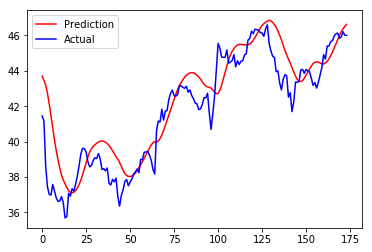

In [32]:
import matplotlib.pyplot as plt2

plt2.plot(newp,color='red', label='Prediction')
plt2.plot(newy_test,color='blue', label='Actual')
plt2.legend(loc='best')
plt2.show()